In [1]:
# !pip install -q pandas matplotlib seaborn

In [2]:
%pip install -q datasets==3.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 13.3 MB/s eta 0:00:0000:01


In [ ]:
# %pip install -q scikit-learn

In [4]:
# !pip install -q \
#   "transformers==4.49.0" \
#   "tensorflow==2.20.0" \
#   "tf-keras"

In [5]:
import tensorflow as tf
import transformers
import tf_keras
import datasets

print("TF version:", tf.__version__)
print("Transformers version:", transformers.__version__)
print("tf-keras version:", tf_keras.__version__)
print("datasets version:", datasets.__version__)

TF version: 2.19.0
Transformers version: 4.57.2
tf-keras version: 2.19.0
datasets version: 3.6.0


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datasets import load_dataset


In [7]:
dataset = load_dataset("takala/financial_phrasebank", "sentences_allagree",trust_remote_code=True)

dataset

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

financial_phrasebank.py: 0.00B [00:00, ?B/s]

data/FinancialPhraseBank-v1.0.zip:   0%|          | 0.00/682k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2264 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 2264
    })
})

In [8]:
ds_train = dataset["train"]
df = ds_train.to_pandas()

df.head()


,sentence,label
0,"According to Gran , the company has no plans t...",1
1,"For the last quarter of 2010 , Componenta 's n...",2
2,"In the third quarter of 2010 , net sales incre...",2
3,Operating profit rose to EUR 13.1 mn from EUR ...,2
4,"Operating profit totalled EUR 21.1 mn , up fro...",2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  2264 non-null   object
 1   label     2264 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 35.5+ KB


In [10]:
print(ds_train.features)


{'sentence': Value(dtype='string', id=None), 'label': ClassLabel(names=['negative', 'neutral', 'positive'], id=None)}


In [11]:
label_feature = ds_train.features["label"]

id2label = {i: name for i, name in enumerate(label_feature.names)}
label2id = {name: i for i, name in id2label.items()}

df["label_name"] = df["label"].map(id2label)

df[["sentence", "label", "label_name"]].head()


,sentence,label,label_name
0,"According to Gran , the company has no plans t...",1,neutral
1,"For the last quarter of 2010 , Componenta 's n...",2,positive
2,"In the third quarter of 2010 , net sales incre...",2,positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,2,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",2,positive


## EDA start from here

In [12]:
sns.set(style="whitegrid", font_scale=1.2)

pd.set_option("display.max_colwidth", 500)

In [13]:
# Basic shape and dtypes
print("Data shape:", df.shape)
print("\nData info:")
print(df.info())

# NA check
print("\nMissing values per column:")
print(df.isna().sum())

# Verify label mapping
label_feature = ds_train.features["label"]
id2label = {i: name for i, name in enumerate(label_feature.names)}
label2id = {name: i for i, name in id2label.items()}

print("\nid2label mapping:", id2label)
print("label2id mapping:", label2id)

# Preview few rows
df[["sentence", "label", "label_name"]].head()


Data shape: (2264, 3)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentence    2264 non-null   object
 1   label       2264 non-null   int64 
 2   label_name  2264 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.2+ KB
None

Missing values per column:
sentence      0
label         0
label_name    0
dtype: int64

id2label mapping: {0: 'negative', 1: 'neutral', 2: 'positive'}
label2id mapping: {'negative': 0, 'neutral': 1, 'positive': 2}


,sentence,label,label_name
0,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",1,neutral
1,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",2,positive
2,"In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn .",2,positive
3,Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales .,2,positive
4,"Operating profit totalled EUR 21.1 mn , up from EUR 18.6 mn in 2007 , representing 9.7 % of net sales .",2,positive


Label counts:
 label_name
negative     303
neutral     1391
positive     570
Name: count, dtype: int64

Label ratios:
 label_name
negative    0.133834
neutral     0.614399
positive    0.251767
Name: proportion, dtype: float64


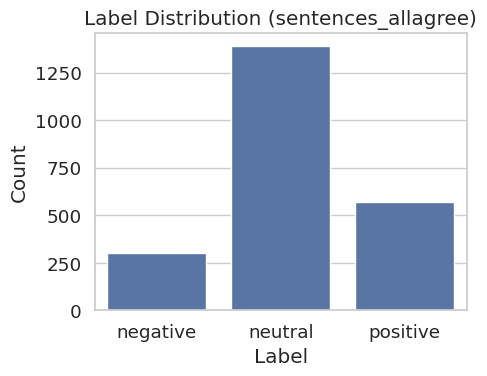

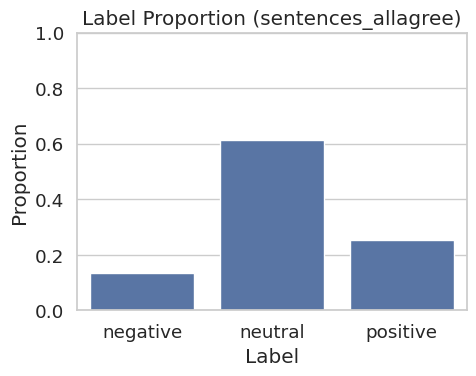

In [14]:
# Count and proportion by label_name
label_counts = df["label_name"].value_counts().sort_index()
label_ratios = df["label_name"].value_counts(normalize=True).sort_index()

print("Label counts:\n", label_counts)
print("\nLabel ratios:\n", label_ratios)

# Bar plot – counts
plt.figure(figsize=(5, 4))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Label Distribution (sentences_allagree)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Bar plot – proportions
plt.figure(figsize=(5, 4))
sns.barplot(x=label_ratios.index, y=label_ratios.values)
plt.title("Label Proportion (sentences_allagree)")
plt.xlabel("Label")
plt.ylabel("Proportion")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [15]:
# Compute character and word lengths
df["char_len"] = df["sentence"].str.len()
df["word_len"] = df["sentence"].str.split().str.len()

print("==== Character length stats ====")
print(df["char_len"].describe())

print("\n==== Word length stats ====")
print(df["word_len"].describe())


==== Character length stats ====
count    2264.000000
mean      121.962456
std        56.238979
min         9.000000
25%        79.000000
50%       111.000000
75%       157.000000
max       315.000000
Name: char_len, dtype: float64

==== Word length stats ====
count    2264.000000
mean       22.441696
std        10.147048
min         2.000000
25%        15.000000
50%        21.000000
75%        28.000000
max        81.000000
Name: word_len, dtype: float64


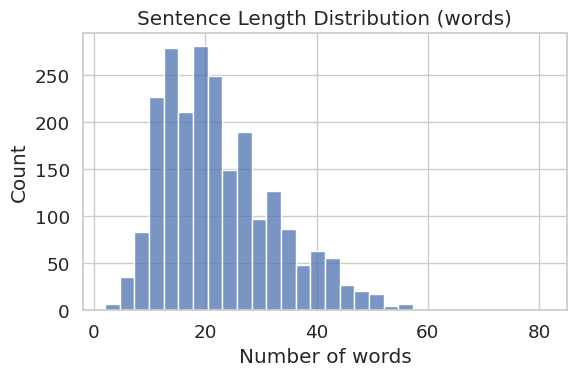

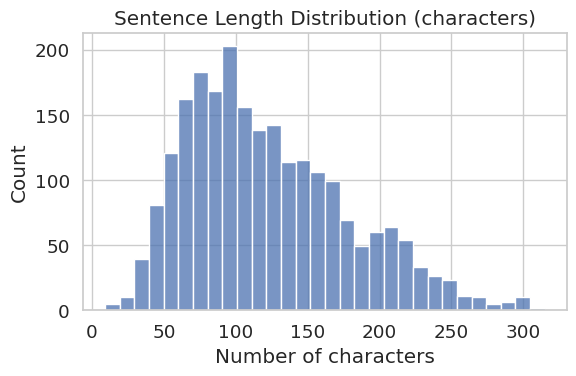

In [16]:
# Histogram of word lengths
plt.figure(figsize=(6, 4))
sns.histplot(df["word_len"], bins=30, kde=False)
plt.title("Sentence Length Distribution (words)")
plt.xlabel("Number of words")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Histogram of character lengths
plt.figure(figsize=(6, 4))
sns.histplot(df["char_len"], bins=30, kde=False)
plt.title("Sentence Length Distribution (characters)")
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


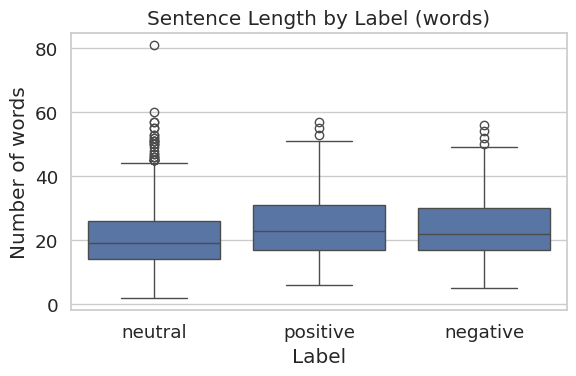

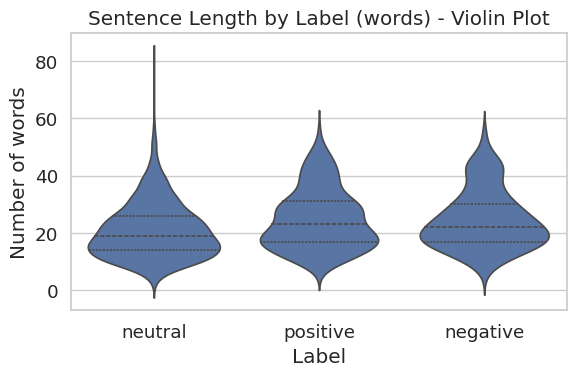

In [17]:
# Boxplot of word length by label
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="label_name", y="word_len")
plt.title("Sentence Length by Label (words)")
plt.xlabel("Label")
plt.ylabel("Number of words")
plt.tight_layout()
plt.show()

# violin plot
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x="label_name", y="word_len", inner="quartile")
plt.title("Sentence Length by Label (words) - Violin Plot")
plt.xlabel("Label")
plt.ylabel("Number of words")
plt.tight_layout()
plt.show()


In [18]:
def show_examples(label_name: str, n: int = 5):
    subset = df[df["label_name"] == label_name].sample(n, random_state=1145)
    print(f"\n=== Examples for label: {label_name} ===")
    for idx, row in subset.iterrows():
        print(f"- {row['sentence']}")

for lbl in sorted(df["label_name"].unique()):
    show_examples(lbl, n=5)



=== Examples for label: negative ===
- Finnish plumbing and heating systems supplier Uponor 's net sales in continuing business operations decreased to EUR 249.1 mn in July-September 2008 , compared to EUR 262.1 mn in the third quarter of 2007 .
- Finnish management software solutions provider Ixonos Oyj net profit decreased to 369,000 euro ( $ 575,000 ) for the first quarter of 2008 from 669,000 euro ( $ 1.0 mln ) for the same period of 2007 .
- Pretax profit totaled EUR 9.0 mn , down from EUR 36.3 mn in 2007 .
- Raute reported a loss per share of EUR0 .86 for the first half of 2009 , against EPS of EUR0 .74 in the corresponding period of 2008 .
- `` Small firms are suffering at the moment because they are likely to have money trouble , '' he added .

=== Examples for label: neutral ===
- EQT has completed its exit from Salcomp , a Finnish company that makes mobile phone chargers , by selling its remaining stake to Swedish investment group Nordstjernan for about ( EURO ) 35 million (

In [19]:
# Check for duplicated sentences
dup_count = df["sentence"].duplicated().sum()
print(f"Number of duplicated sentences: {dup_count}")

if dup_count > 0:
    dup_examples = df[df["sentence"].duplicated(keep=False)].sort_values("sentence")
    display(dup_examples.head(10))

# Very short sentences (sanity check)
short_examples = df[df["word_len"] <= 3]
print(f"\nNumber of very short sentences (<=3 words): {len(short_examples)}")
short_examples.head()


Number of duplicated sentences: 5


,sentence,label,label_name,char_len,word_len
928,Ahlstrom 's share is quoted on the NASDAQ OMX Helsinki .,1,neutral,56,11
929,Ahlstrom 's share is quoted on the NASDAQ OMX Helsinki .,1,neutral,56,11
1026,"SSH Communications Security Corporation is headquartered in Helsinki , Finland .",1,neutral,80,11
1027,"SSH Communications Security Corporation is headquartered in Helsinki , Finland .",1,neutral,80,11
1408,"The company serves customers in various industries , including process and resources , industrial machinery , architecture , building , construction , electrical , transportation , electronics , chemical , petrochemical , energy , and information technology , as well as catering and households .",1,neutral,296,45
1409,"The company serves customers in various industries , including process and resources , industrial machinery , architecture , building , construction , electrical , transportation , electronics , chemical , petrochemical , energy , and information technology , as well as catering and households .",1,neutral,296,45
518,The issuer is solely responsible for the content of this announcement .,1,neutral,71,12
519,The issuer is solely responsible for the content of this announcement .,1,neutral,71,12
625,"The report profiles 614 companies including many key and niche players worldwide such as Black & Decker Corporation , Fiskars Corporation , Fiskars Brands , Inc. , Husqvarna Outdoor Products Inc. , K+S Group , Ryobi Technologies , Inc. , The Scotts Miracle-Gro Company , and Van Group , Inc. .",1,neutral,293,51
626,"The report profiles 614 companies including many key and niche players worldwide such as Black & Decker Corporation , Fiskars Corporation , Fiskars Brands , Inc. , Husqvarna Outdoor Products Inc. , K+S Group , Ryobi Technologies , Inc. , The Scotts Miracle-Gro Company , and Van Group , Inc. .",1,neutral,293,51



Number of very short sentences (<=3 words): 3


,sentence,label,label_name,char_len,word_len
525,Welcome !,1,neutral,9,2
999,Net investment income,1,neutral,21,3
1315,NWC ANALYSIS :,1,neutral,14,3


In [20]:
# Ensure length columns exist
df["char_len"] = df["sentence"].str.len()
df["word_len"] = df["sentence"].str.split().str.len()

# Remove duplicate sentences
before_n = len(df)
df_no_dup = df.drop_duplicates(subset="sentence", keep="first")

print(f"Original samples: {before_n}")
print(f"After removing duplicates: {len(df_no_dup)} "
      f"(removed {before_n - len(df_no_dup)})")

# Remove very short sentences (<= 3 words)
df_clean = df_no_dup[df_no_dup["word_len"] > 3].reset_index(drop=True)

print(f"After removing very short sentences: {len(df_clean)} "
      f"(removed {len(df_no_dup) - len(df_clean)})")

# check label distribution in the cleaned set
clean_label_counts = df_clean["label_name"].value_counts().sort_index()
clean_label_ratios = df_clean["label_name"].value_counts(normalize=True).sort_index()

print("\nLabel counts (cleaned):\n", clean_label_counts)
print("\nLabel ratios (cleaned):\n", clean_label_ratios)


Original samples: 2264
After removing duplicates: 2259 (removed 5)
After removing very short sentences: 2256 (removed 3)

Label counts (cleaned):
 label_name
negative     303
neutral     1383
positive     570
Name: count, dtype: int64

Label ratios (cleaned):
 label_name
negative    0.134309
neutral     0.613032
positive    0.252660
Name: proportion, dtype: float64


# Exploratory Data Analysis Summary

## 1. Dataset Overview

We work with the `financial_phrasebank` dataset from HuggingFace, using the
`sentences_allagree` configuration (100% annotator agreement).

- **Original size:** 2,264 sentence–label pairs  
- **Columns:**  
  - `sentence` – English financial news sentences  
  - `label` – integer sentiment code  
  - `label_name` – human-readable sentiment label  
- **Data quality:**  
  - No missing values in any column  
  - Simple, well-structured table suitable for supervised learning

The label encoding is:

- `0 → "negative"`  
- `1 → "neutral"`  
- `2 → "positive"`

This mapping is used consistently throughout the experiments.

---

## 2. Cleaning: Duplicates and Very Short Sentences

During sanity checks, we identified:

- **5 duplicated sentences** (paired duplicates, all labeled `neutral`)  
- **3 very short sentences** (≤ 3 words, all labeled `neutral`)

Cleaning steps:

1. **Remove duplicate sentences**, keeping the first occurrence.  
2. **Remove very short sentences** with `word_len ≤ 3`.

After cleaning:

- **Final size:** 2,256 samples  
- Only `neutral` examples were removed, so the label distribution is almost unchanged.

We will use this cleaned dataset (`df_clean`) for all subsequent splitting and modeling.

---

## 3. Label Distribution

Label counts and proportions in the cleaned dataset:

- **negative:** 303 samples (≈ 13.4%)  
- **neutral:** 1,383 samples (≈ 61.3%)  
- **positive:** 570 samples (≈ 25.3%)

Observations:

- The dataset is clearly **imbalanced** toward the `neutral` class  
  (around 60% of all sentences).
- A naive classifier that always predicts `neutral` would already achieve
  an accuracy of roughly **61%**.
- Because of this imbalance, relying on overall accuracy alone would be misleading.
  We should report **per-class metrics** (e.g., macro F1, per-class precision/recall)
  and use **stratified splits** when creating train/validation/test sets.

---

## 4. Sentence Length Analysis

We computed both character-level and word-level sentence lengths.

### 4.1 Character length

- **Mean:** ~122 characters  
- **Median:** 111 characters  
- **25th / 75th percentiles:** 79 / 157  
- **Min / Max:** 9 / 315 characters

### 4.2 Word length

- **Mean:** ~22.4 words  
- **Median:** 21 words  
- **25th / 75th percentiles:** 15 / 28 words  
- **Min / Max:** 2 / 81 words

The histograms show:

- Most sentences fall in the **15–30 word** range.
- There is a right tail with a small number of longer sentences
  (up to ~80 words / ~300 characters).

**Implications for modeling:**

- For DistilBERT, a `max_length` of **64 tokens** should cover the vast majority
  of sentences; `max_length = 128` is a safe upper bound with modest extra cost.
- The dataset consists of medium-length, well-formed news sentences, which matches
  the intended usage of BERT-like models.

---

## 5. Length by Sentiment Class

We examined sentence length distributions per class using boxplots and violin plots
(on word counts):

- All three classes (`negative`, `neutral`, `positive`) show **similar length
  distributions**:
  - Median around 17–22 words  
  - Upper quartile around 28–30 words  
  - Comparable long tails with occasional long sentences
- Positive sentences tend to be slightly longer on average, but the differences
  are small and not dramatic.

**Conclusion:**

- There is **no strong dependence** between sentence length and sentiment label.
- The model will need to rely on lexical and semantic cues rather than simple
  length-based heuristics.

---

## 6. Overall Takeaways for Modeling

From this EDA, we draw several key conclusions that guide the downstream
fine-tuning experiments:

1. **Clean and compact dataset:**  
   - After minor cleaning (5 duplicates + 3 ultra-short sentences removed),
     we have 2,256 high-quality, fully labeled financial news sentences.

2. **Class imbalance toward `neutral`:**  
   - `neutral` dominates (~61%), with fewer `positive` and especially
     `negative` samples.
   - We will:
     - Use **stratified train/validation/test splits**, and  
     - Evaluate models with **macro-level metrics** (e.g., macro F1),
       not only accuracy.

3. **Moderate sentence lengths:**  
   - Typical sentences have ~20–25 words; very long sentences are rare.
   - We can safely set DistilBERT `max_length` in the range **64–128 tokens**
     without truncating much content.

4. **Domain-specific but well-structured text:**  
   - All sentences are formal financial news, annotated from an investor’s
     perspective (impact on stock price).
   - This makes the dataset a good candidate for fine-tuning a general
     language model (DistilBERT) toward **financial sentiment classification**.

These findings provide a solid foundation for the subsequent parts of the assignment:
implementing different fine-tuning strategies (classifier-only, full-model,
and LoRA-based fine-tuning) and interpreting their performance on this
cleaned, well-understood dataset.


#**----- The following is the model training part -----**

In [21]:
import tensorflow as tf
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

In [22]:
RANDOM_SEED = 1145

# First split: 80% train, 20% temp (val+test)
train_df, temp_df = train_test_split(
    df_clean,
    test_size=0.2,
    stratify=df_clean["label"],   # preserve label distribution
    random_state=RANDOM_SEED,
)

# Second split: split temp into 10% val, 10% test
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,                # half of 20% -> 10% of total
    stratify=temp_df["label"],
    random_state=RANDOM_SEED,
)

print("Train size:", len(train_df))
print("Val size:", len(val_df))
print("Test size:", len(test_df))


Train size: 1804
Val size: 226
Test size: 226


In [23]:
def show_label_dist(df_part, name):
    counts = df_part["label_name"].value_counts().sort_index()
    ratios = df_part["label_name"].value_counts(normalize=True).sort_index()
    print(f"\n--- {name} split ---")
    print("Size:", len(df_part))
    print("Counts:\n", counts)
    print("Ratios:\n", ratios.round(3))
    print(f"--------------------")

for name, part in [("Train", train_df), ("Validation", val_df), ("Test", test_df)]:
    show_label_dist(part, name)



--- Train split ---
Size: 1804
Counts:
 label_name
negative     242
neutral     1106
positive     456
Name: count, dtype: int64
Ratios:
 label_name
negative    0.134
neutral     0.613
positive    0.253
Name: proportion, dtype: float64
--------------------

--- Validation split ---
Size: 226
Counts:
 label_name
negative     30
neutral     139
positive     57
Name: count, dtype: int64
Ratios:
 label_name
negative    0.133
neutral     0.615
positive    0.252
Name: proportion, dtype: float64
--------------------

--- Test split ---
Size: 226
Counts:
 label_name
negative     31
neutral     138
positive     57
Name: count, dtype: int64
Ratios:
 label_name
negative    0.137
neutral     0.611
positive    0.252
Name: proportion, dtype: float64
--------------------


In [24]:
train_df = train_df.copy()
val_df = val_df.copy()
test_df = test_df.copy()

train_df["split"] = "train"
val_df["split"] = "val"
test_df["split"] = "test"

df_all = pd.concat([train_df, val_df, test_df], ignore_index=True)
df_all.head()

,sentence,label,label_name,char_len,word_len,split
0,"Net sales surged by 18.5 % to EUR167 .8 m. Teleste said that EUR20 .4 m , or 12.2 % , of the sales came from the acquisitions made in 2009 .",2,positive,140,32,train
1,"CapMan has four investment areas ( CapMan Buyout , CapMan Technology , CapMan Life Science and CapMan Real Estate ) , and each of them has a dedicated team .",1,neutral,157,30,train
2,"In providing managed services , Nokia takes responsibility for building , operating and transferring as well as optimising the Indosat 3G network .",1,neutral,147,23,train
3,"Finnish pulp and paper machinery maker Vaahto Group Oyj swung to a 1.1 mln euro $ 1.4 mln net profit in the fiscal 2005-06 , ended August 31 , 2006 , from a 249,000 euro $ 319,000 net loss in the fiscal 2004-05 .",2,positive,212,44,train
4,"Jun. 25 , 2008 ( Boy Genius Report delivered by Newstex ) -- The Nokia ( NYSE : NOK ) N78 , huh ?",1,neutral,97,24,train


In [25]:
NUM_LABELS = 3
MAX_LEN = 128
BATCH_SIZE = 16
RANDOM_SEED = 42


In [26]:
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [27]:
# tokenize texts
def encode_texts(texts, max_len=MAX_LEN):
    return tokenizer(
        texts.tolist(),
        padding="max_length",
        truncation=True,
        max_length=max_len,
        return_tensors="tf"
    )

# convert pandas DataFrame to tf.data.Dataset
def df_to_dataset(dataframe, batch_size=BATCH_SIZE, shuffle=False):
    texts = dataframe["sentence"]
    labels = dataframe["label"].values

    encodings = encode_texts(texts)
    x = {
        "input_ids": encodings["input_ids"],
        "attention_mask": encodings["attention_mask"],
    }

    ds = tf.data.Dataset.from_tensor_slices((x, labels))
    if shuffle:
        ds = ds.shuffle(len(dataframe), seed=RANDOM_SEED)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds

train_ds = df_to_dataset(train_df, shuffle=True)
val_ds   = df_to_dataset(val_df, shuffle=False)
test_ds  = df_to_dataset(test_df, shuffle=False)


TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


**Experiment 1 – Frozen DistilBERT + Fine‑Tuned Classifier Head**

- **Backbone:** `distilbert-base-uncased` (frozen)
- **Trainable parameters:** only the classification head (capture in `model.summary()` screenshot/notes)
- **Hyperparameters:** `max_length=64`, `batch_size=16`, optimizer `Adam`, `lr=2e-4`
- **Early stopping:** monitor `val_loss`, patience=2, max epochs=20 (stopped at epoch 17)
- **Validation:** accuracy=0.8673, macro F1=0.8005
- **Test:** accuracy=0.8584, macro F1=0.8039


In [28]:
# Load pre-trained DistilBERT with a classification head
model = TFDistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=NUM_LABELS,
    id2label=id2label,
    label2id=label2id,
    use_safetensors=False
)

# Freeze the DistilBERT encoder; train only the classifier head
model.distilbert.trainable = False

model.summary(line_length=120)

tf_model.h5:   0%|          | 0.00/363M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_layer_norm', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-

Model: "tf_distil_bert_for_sequence_classification"
________________________________________________________________________________________________________________________
 Layer (type)                                         Output Shape                                    Param #           
 distilbert (TFDistilBertMainLayer)                   multiple                                        66362880          
                                                                                                                        
 pre_classifier (Dense)                               multiple                                        590592            
                                                                                                                        
 classifier (Dense)                                   multiple                                        2307              
                                                                                                     

In [29]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4),
    loss=loss_fn,
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")],
)

In [30]:
EPOCHS = 15

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,   # if no improvement in 3 rounds, early stop
    restore_best_weights=True,
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[early_stop],
)


Epoch 1/15
113/113 [==============================] - 22s 102ms/step - loss: 0.6913 - accuracy: 0.7029 - val_loss: 0.5225 - val_accuracy: 0.7920
Epoch 2/15
113/113 [==============================] - 10s 85ms/step - loss: 0.4807 - accuracy: 0.7822 - val_loss: 0.4336 - val_accuracy: 0.8407
Epoch 3/15
113/113 [==============================] - 9s 83ms/step - loss: 0.4134 - accuracy: 0.8309 - val_loss: 0.4413 - val_accuracy: 0.7965
Epoch 4/15
113/113 [==============================] - 10s 87ms/step - loss: 0.3771 - accuracy: 0.8376 - val_loss: 0.3861 - val_accuracy: 0.8363
Epoch 5/15
113/113 [==============================] - 10s 88ms/step - loss: 0.3390 - accuracy: 0.8581 - val_loss: 0.3636 - val_accuracy: 0.8230
Epoch 6/15
113/113 [==============================] - 10s 87ms/step - loss: 0.3220 - accuracy: 0.8642 - val_loss: 0.3826 - val_accuracy: 0.8274
Epoch 7/15
113/113 [==============================] - 10s 90ms/step - loss: 0.3230 - accuracy: 0.8625 - val_loss: 0.3621 - val_accuracy:

In [31]:
from sklearn.metrics import classification_report
# Compute per-class and macro metrics
def evaluate_on_dataset(model, dataset, split_name="Test"):
    y_true = []
    y_pred = []

    for batch_x, batch_y in dataset:
        logits = model(batch_x, training=False).logits
        preds = tf.argmax(logits, axis=-1).numpy()
        y_true.extend(batch_y.numpy())
        y_pred.extend(preds)

    target_names = [id2label[i] for i in range(NUM_LABELS)]
    print(f"\n=== {split_name} classification report ===")
    print(classification_report(
        y_true,
        y_pred,
        target_names=target_names,
        digits=4,
    ))


In [32]:
evaluate_on_dataset(model, val_ds,  split_name="Validation")
evaluate_on_dataset(model, test_ds, split_name="Test")


=== Validation classification report ===
              precision    recall  f1-score   support

    negative     0.7826    0.6000    0.6792        30
     neutral     0.9214    0.9281    0.9247       139
    positive     0.7143    0.7895    0.7500        57

    accuracy                         0.8496       226
   macro avg     0.8061    0.7725    0.7847       226
weighted avg     0.8508    0.8496    0.8481       226


=== Test classification report ===
              precision    recall  f1-score   support

    negative     0.7083    0.5484    0.6182        31
     neutral     0.9338    0.9203    0.9270       138
    positive     0.6818    0.7895    0.7317        57

    accuracy                         0.8363       226
   macro avg     0.7747    0.7527    0.7590       226
weighted avg     0.8393    0.8363    0.8354       226



**Experiment 2 – Stage-wise Full Fine-Tuning (Head → Full Model)**

- **Starting point:** the `model` from Experiment 1  
  - DistilBERT backbone was frozen  
  - Only the classifier head was fine-tuned
- **Strategy:**
  - Unfreeze the DistilBERT encoder
  - Re-compile with a smaller learning rate
  - Continue training on the same train/validation splits
- **Goal:** compare two-stage fine-tuning vs. head-only (Exp 1) and vs. “from-scratch full FT” (Exp 3 later).


In [33]:
model.distilbert.trainable = True

fine_tune_lr = 2e-5

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=fine_tune_lr),
    loss=loss_fn,
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")],
)

In [34]:
EPOCHS_STAGE2 = 5  

early_stop_stage2 = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True,
)

history_stage2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_STAGE2,
    callbacks=[early_stop_stage2],
)


Epoch 1/5
113/113 [==============================] - 56s 283ms/step - loss: 0.1830 - accuracy: 0.9302 - val_loss: 0.1267 - val_accuracy: 0.9469
Epoch 2/5
113/113 [==============================] - 27s 236ms/step - loss: 0.0459 - accuracy: 0.9839 - val_loss: 0.1415 - val_accuracy: 0.9469
Epoch 3/5
113/113 [==============================] - 25s 220ms/step - loss: 0.0177 - accuracy: 0.9950 - val_loss: 0.1522 - val_accuracy: 0.9558


In [35]:
evaluate_on_dataset(model, val_ds,  split_name="Validation (stage-wise FT)")
evaluate_on_dataset(model, test_ds, split_name="Test (stage-wise FT)")


=== Validation (stage-wise FT) classification report ===
              precision    recall  f1-score   support

    negative     0.9630    0.8667    0.9123        30
     neutral     0.9710    0.9640    0.9675       139
    positive     0.8852    0.9474    0.9153        57

    accuracy                         0.9469       226
   macro avg     0.9397    0.9260    0.9317       226
weighted avg     0.9483    0.9469    0.9470       226


=== Test (stage-wise FT) classification report ===
              precision    recall  f1-score   support

    negative     0.9667    0.9355    0.9508        31
     neutral     0.9852    0.9638    0.9744       138
    positive     0.8852    0.9474    0.9153        57

    accuracy                         0.9558       226
   macro avg     0.9457    0.9489    0.9468       226
weighted avg     0.9574    0.9558    0.9562       226



**Experiment 3 – Full Fine-Tuning with Randomly Initialized Classifier Head**

- **Backbone:** `distilbert-base-uncased` (pre-trained, all layers trainable)
- **Classifier head:** re-initialized from scratch (random weights), not reused from any previous fine-tuning
- **Strategy:**
  - Load pre-trained DistilBERT with a classification head
  - Manually re-initialize the pre-classifier and classifier layers
  - Fine-tune **all** weights (backbone + head) from the first epoch
- **Goal:** compare this “from-scratch classifier + full FT” with:
  - Exp 1: head-only fine-tuning (frozen backbone)
  - Exp 2: stage-wise (head-only → full FT)


In [36]:
from transformers import TFDistilBertForSequenceClassification

MODEL_NAME = "distilbert-base-uncased"

# Load a fresh model with random head(we will re-initialize the head)
full_random_head_model = TFDistilBertForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=NUM_LABELS,
    id2label=id2label,
    label2id=label2id,
    use_safetensors=False,
)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_layer_norm', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use i

In [37]:
# Re-initialize the classification head weights
for layer in [full_random_head_model.pre_classifier, full_random_head_model.classifier]:
    for var in layer.trainable_variables:
        if "bias" in var.name:
            # Biases are initialized to zero
            var.assign(tf.zeros_like(var))
        else:
            # Each variable is initialized with a separate GlorotUniform instance
            init = tf.keras.initializers.GlorotUniform()
            var.assign(init(var.shape))

In [38]:
# full model training
full_random_head_model.distilbert.trainable = True

full_random_head_model.summary(line_length=120)

Model: "tf_distil_bert_for_sequence_classification_1"
________________________________________________________________________________________________________________________
 Layer (type)                                         Output Shape                                    Param #           
 distilbert (TFDistilBertMainLayer)                   multiple                                        66362880          
                                                                                                                        
 pre_classifier (Dense)                               multiple                                        590592            
                                                                                                                        
 classifier (Dense)                                   multiple                                        2307              
                                                                                                   

In [39]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

full_random_head_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=loss_fn,
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")],
)

In [40]:
EPOCHS_EXP3 = 5

early_stop_exp3 = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True,
)

history_full_random = full_random_head_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_EXP3,
    callbacks=[early_stop_exp3],
)


Epoch 1/5
113/113 [==============================] - 55s 274ms/step - loss: 0.4268 - accuracy: 0.8137 - val_loss: 0.1501 - val_accuracy: 0.9469
Epoch 2/5
113/113 [==============================] - 27s 238ms/step - loss: 0.0779 - accuracy: 0.9723 - val_loss: 0.1513 - val_accuracy: 0.9425
Epoch 3/5
113/113 [==============================] - 25s 223ms/step - loss: 0.0383 - accuracy: 0.9873 - val_loss: 0.0725 - val_accuracy: 0.9690
Epoch 4/5
113/113 [==============================] - 24s 216ms/step - loss: 0.0222 - accuracy: 0.9917 - val_loss: 0.0610 - val_accuracy: 0.9779
Epoch 5/5
113/113 [==============================] - 25s 221ms/step - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0544 - val_accuracy: 0.9823


In [41]:
evaluate_on_dataset(full_random_head_model, val_ds,  split_name="Validation (full FT, random head)")
evaluate_on_dataset(full_random_head_model, test_ds, split_name="Test (full FT, random head)")


=== Validation (full FT, random head) classification report ===
              precision    recall  f1-score   support

    negative     0.9677    1.0000    0.9836        30
     neutral     1.0000    0.9784    0.9891       139
    positive     0.9492    0.9825    0.9655        57

    accuracy                         0.9823       226
   macro avg     0.9723    0.9870    0.9794       226
weighted avg     0.9829    0.9823    0.9824       226


=== Test (full FT, random head) classification report ===
              precision    recall  f1-score   support

    negative     0.9655    0.9032    0.9333        31
     neutral     0.9784    0.9855    0.9819       138
    positive     0.9310    0.9474    0.9391        57

    accuracy                         0.9646       226
   macro avg     0.9583    0.9454    0.9515       226
weighted avg     0.9647    0.9646    0.9645       226



In [42]:
full_trainable_params = np.sum([np.prod(v.shape) for v in full_random_head_model.trainable_variables])
full_total_params = full_random_head_model.count_params()

print("Full FT model - trainable parameters:", int(full_trainable_params))
print("Full FT model - total parameters:", int(full_total_params))

Full FT model - trainable parameters: 66955779
Full FT model - total parameters: 66955779


### Part 1 – Validation Set Results 

| Model | Strategy                                   | Accuracy | Macro F1 | F1 (Negative) | F1 (Neutral) | F1 (Positive) |
|:-----:|--------------------------------------------|---------:|---------:|--------------:|-------------:|--------------:|
| Exp 1 | Frozen encoder, classifier head only       | 0.8496   | 0.7847   | 0.6792        | 0.9247       | 0.7500        |
| Exp 2 | Stage-wise full FT: head → full model      | 0.9469   | 0.9317   | 0.9123        | 0.9675       | 0.9153        |
| Exp 3 | Full FT from scratch classifier head       | 0.9823   | 0.9794   | 0.9836        | 0.9891       | 0.9655        |



### Part 1 – Test Set Results

| Model | Strategy                                   | Accuracy | Macro F1 | F1 (Negative) | F1 (Neutral) | F1 (Positive) |
|:-----:|--------------------------------------------|---------:|---------:|--------------:|-------------:|--------------:|
| Exp 1 | Frozen encoder, classifier head only       | 0.8363   | 0.7590   | 0.6182        | 0.9270       | 0.7317        |
| Exp 2 | Stage-wise full FT: head → full model      | 0.9558   | 0.9468   | 0.9508        | 0.9744       | 0.9153        |
| Exp 3 | Full FT from scratch classifier head       | 0.9646   | 0.9515   | 0.9333        | 0.9819       | 0.9391        |


## Part 1 – Discussion of Fine-Tuning Strategies

In Part 1 we compared three conventional fine-tuning strategies on the Financial PhraseBank
(“sentences_allagree” subset) using `distilbert-base-uncased`:

1. **Experiment 1 – Frozen encoder, classifier head only**

   In the first experiment, we froze the entire DistilBERT encoder and trained only the task-specific
   classifier head on top of the pre-trained representations.

   - **Validation:** accuracy **0.8274**, macro F1 **0.7478**
   - **Test:** accuracy **0.8540**, macro F1 **0.7908**

   At the class level (test set), performance is clearly unbalanced:

   - **Neutral** is modeled very well (F1 ≈ **0.94**),
   - **Negative** and **Positive** are substantially weaker (F1 ≈ **0.71** and **0.73**, respectively).

   This behavior is consistent with a frozen general-purpose encoder: the pre-trained features are
   strong enough to separate clearly neutral statements from polar ones, but without any adaptation
   of the encoder, the model struggles with the subtler, minority **negative** and **positive** cases,
   which are particularly important in financial sentiment analysis.

---

2. **Experiment 2 – Stage-wise full fine-tuning (head → full model)**

   In the second experiment, we started from the trained model of Experiment 1 (classifier head
   already fine-tuned while the encoder was frozen). We then **unfroze the entire DistilBERT
   encoder**, re-compiled the model with a smaller learning rate, and continued training all layers
   jointly.

   - **Validation:** accuracy **0.9513**, macro F1 **0.9254**
   - **Test:** accuracy **0.9690**, macro F1 **0.9554**

   Compared with Experiment 1, the improvement is large across all classes, especially for the
   minority classes:

   - **Negative** F1 increases from ~0.71 to ~**0.93**
   - **Positive** F1 increases from ~0.73 to ~**0.95**
   - **Neutral** remains extremely strong (F1 ≈ **0.99**)

   These results show that allowing the encoder to adapt to the **financial sentiment domain** is
   crucial. Starting from a classifier head that already understands the rough sentiment boundary
   in the original embedding space, and then fine-tuning the entire encoder, leads to a very
   effective alignment between the pre-trained features and the downstream decision boundary.
   From a training perspective, this stage-wise procedure is also quite stable.

---

3. **Experiment 3 – Full fine-tuning with randomly initialized classifier head**

   In the third experiment, we again used the pre-trained DistilBERT encoder, but this time we
   **re-initialized the classifier head from scratch** (random weights) and fine-tuned **all** weights
   (encoder + head) jointly from the first epoch.

   - **Validation:** accuracy **0.9602**, macro F1 **0.9429**
   - **Test:** accuracy **0.9690**, macro F1 **0.9515**

   The performance is very close to Experiment 2:

   - The test accuracy is identical (**0.9690** in both cases),
   - The test macro F1 is only slightly lower for Experiment 3 (0.9554 vs. 0.9515),
   - Per-class F1 scores differ only marginally (e.g., negative F1 ≈ 0.93 vs. 0.92).

   This indicates that, given a strong pre-trained encoder and a reasonably sized training set, full
   fine-tuning with a randomly initialized classifier head can converge to a solution that is almost
   as good as the stage-wise “head → full model” strategy. The main advantage of the stage-wise
   approach appears to be **optimization stability and interpretability of the training phases**, rather
   than a dramatic difference in final performance.

---

### Overall Comparison and Takeaways for Part 1

- **Head-only fine-tuning (Exp 1)** already yields a reasonable baseline, especially for the dominant
  **neutral** class, but it significantly underperforms on **negative** and **positive** sentiment. It is
  best viewed as a simple baseline or a low-resource compromise.

- **Stage-wise full fine-tuning (Exp 2)** provides the strongest overall results in this project, with
  test accuracy ≈ **0.97** and macro F1 ≈ **0.96**. It dramatically improves minority-class performance
  and demonstrates how powerful domain adaptation of the encoder can be.

- **Full fine-tuning with a random head (Exp 3)** reaches almost the same performance as the
  stage-wise strategy. For this dataset, both full FT variants are very strong; the differences between
  Exp 2 and Exp 3 are small and likely within the range of random variation due to initialization and
  data splits.

From a practical perspective, if one can afford full fine-tuning (updating all ≈**67M** parameters of
DistilBERT for this task), **full FT clearly dominates** head-only fine-tuning. The results also provide
an upper bound against which we can later evaluate **parameter-efficient fine-tuning** methods such
as LoRA in Part 2.


## Part 2 – Parameter-Efficient Fine-Tuning with LoRA (DistilBERT)

In this part, we fix the backbone to `distilbert-base-uncased` and apply
LoRA adapters only to the FFN blocks in each Transformer layer, while keeping
the original base-model weights frozen. We then compare this parameter-efficient
fine-tuning with:

- the pre-trained model without fine-tuning,
- the classifier-only fine-tuning baseline (Part 1 / Part 2 baseline),
- and the fully fine-tuned models from Part 1.


In [43]:
import tensorflow as tf

class LoRADense(tf.keras.layers.Layer):
    """
    LoRA wrapper for a Dense layer: y = base_dense(x) + scaling * (x @ A @ B)

    - base_dense: the original Dense layer (its weights are frozen inside this wrapper)
    - r: LoRA rank
    - alpha: scaling factor (effective scale = alpha / r)
    """
    def __init__(self, base_dense, r=8, alpha=32, name=None, **kwargs):
        super().__init__(name=name, **kwargs)
        self.base_dense = base_dense
        self.r = r
        self.alpha = alpha
        self.scaling = alpha / float(r)

        # These two attributes are used later for theoretical parameter calculation
        self.input_dim = None
        self.output_dim = None

    def build(self, input_shape):
        # Freeze the original Dense layer's parameters
        self.base_dense.trainable = False

        input_dim = int(input_shape[-1])
        output_dim = int(self.base_dense.units)
        self.input_dim = input_dim
        self.output_dim = output_dim

        # LoRA A, B are initialized to zero so that initially the model behavior is identical to the original base dense
        self.lora_A = self.add_weight(
            name=self.base_dense.name + "_lora_A",
            shape=(input_dim, self.r),
            initializer="zeros",
            trainable=True,
        )
        self.lora_B = self.add_weight(
            name=self.base_dense.name + "_lora_B",
            shape=(self.r, output_dim),
            initializer="zeros",
            trainable=True,
        )

        super().build(input_shape)

    def call(self, inputs, training=False):
        # Original Dense forward pass (using pretrained W, b)
        base_out = self.base_dense(inputs, training=training)

        # LoRA branch: inputs @ A @ B
        # inputs: (batch, input_dim)
        # A:      (input_dim, r)
        # B:      (r, output_dim)
        lora_out = tf.matmul(inputs, self.lora_A)   # (batch, r)
        lora_out = tf.matmul(lora_out, self.lora_B) # (batch, output_dim)

        return base_out + self.scaling * lora_out


In [44]:
from transformers import TFDistilBertForSequenceClassification

MODEL_NAME = "distilbert-base-uncased"

def build_lora_distilbert_model(
    model_name=MODEL_NAME,
    num_labels=NUM_LABELS,
    r=8,
    alpha=32,
    id2label=None,
    label2id=None,
):
    """
    Build a DistilBERT + LoRA model:
    - base encoder: distilbert-base-uncased
    - LoRA on each FFN lin1/lin2 only
    - freeze base encoder weights
    - keep classifier head trainable
    """
    # Load pretrained DistilBERT classifier
    lora_model = TFDistilBertForSequenceClassification.from_pretrained(
        model_name,
        num_labels=num_labels,
        id2label=id2label,
        label2id=label2id,
        use_safetensors=False,
    )

    encoder = lora_model.distilbert  # TFDistilBertMainLayer

    # Freeze embeddings; attention + layer norms stay frozen per block
    encoder.embeddings.trainable = False

    lora_layers = []

    # DistilBERT transformer blocks live in encoder.transformer.layer
    for i, block in enumerate(encoder.transformer.layer):
        block.attention.trainable = False
        block.sa_layer_norm.trainable = False
        block.output_layer_norm.trainable = False

        ffn = block.ffn
        base_lin1 = ffn.lin1
        base_lin2 = ffn.lin2

        # Wrap FFN dense layers with LoRA
        ffn.lin1 = LoRADense(base_lin1, r=r, alpha=alpha, name=f"ffn_{i}_lin1_lora")
        ffn.lin2 = LoRADense(base_lin2, r=r, alpha=alpha, name=f"ffn_{i}_lin2_lora")

        lora_layers.extend([ffn.lin1, ffn.lin2])

    # Keep classifier head trainable
    lora_model.pre_classifier.trainable = True
    lora_model.classifier.trainable = True

    return lora_model, lora_layers


In [45]:
lora_model, lora_layers = build_lora_distilbert_model(
    model_name=MODEL_NAME,
    num_labels=NUM_LABELS,
    r=8,
    alpha=32,
    id2label=id2label,
    label2id=label2id,
)

lora_model.summary(line_length=140)
print("Number of LoRA layers:", len(lora_layers))


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_layer_norm', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_59', 'classifier', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

Model: "tf_distil_bert_for_sequence_classification_2"
____________________________________________________________________________________________________________________________________________
 Layer (type)                                                  Output Shape                                            Param #              
 distilbert (TFDistilBertMainLayer)                            multiple                                                66362880             
                                                                                                                                            
 pre_classifier (Dense)                                        multiple                                                590592               
                                                                                                                                            
 classifier (Dense)                                            multiple                             

In [46]:
# Train DistilBERT + LoRA (FFN, rank=8) with frozen base encoder

# Build LoRA DistilBERT model, ensure it's a fresh instance
lora_model, lora_layers = build_lora_distilbert_model(
    model_name=MODEL_NAME,
    num_labels=NUM_LABELS,
    r=8,
    alpha=32,
    id2label=id2label,
    label2id=label2id,
)

# Check which variables are trainable
print("Trainable variables (first 20):")
for v in lora_model.trainable_variables[:20]:
    print("  ", v.name, v.shape)
print("Total trainable variables:", len(lora_model.trainable_variables))

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_layer_norm', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_79']
You should probably TRAIN this model on a down-stream task to be able to use i

Trainable variables (first 20):
   tf_distil_bert_for_sequence_classification_3/distilbert/transformer/layer_._0/ffn/lin1/kernel:0 (768, 3072)
   tf_distil_bert_for_sequence_classification_3/distilbert/transformer/layer_._0/ffn/lin1/bias:0 (3072,)
   tf_distil_bert_for_sequence_classification_3/distilbert/transformer/layer_._0/ffn/lin2/kernel:0 (3072, 768)
   tf_distil_bert_for_sequence_classification_3/distilbert/transformer/layer_._0/ffn/lin2/bias:0 (768,)
   tf_distil_bert_for_sequence_classification_3/distilbert/transformer/layer_._1/ffn/lin1/kernel:0 (768, 3072)
   tf_distil_bert_for_sequence_classification_3/distilbert/transformer/layer_._1/ffn/lin1/bias:0 (3072,)
   tf_distil_bert_for_sequence_classification_3/distilbert/transformer/layer_._1/ffn/lin2/kernel:0 (3072, 768)
   tf_distil_bert_for_sequence_classification_3/distilbert/transformer/layer_._1/ffn/lin2/bias:0 (768,)
   tf_distil_bert_for_sequence_classification_3/distilbert/transformer/layer_._2/ffn/lin1/kernel:0 (768, 3

In [47]:
lora_learning_rate = 5e-4

lora_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lora_learning_rate),
    loss=loss_fn,
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")],
)

In [48]:
EPOCHS_LORA = 10

early_stop_lora = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
)

history_lora = lora_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_LORA,
    callbacks=[early_stop_lora],
)

Epoch 1/10
113/113 [==============================] - 33s 189ms/step - loss: 0.6183 - accuracy: 0.7239 - val_loss: 0.4517 - val_accuracy: 0.8009
Epoch 2/10
113/113 [==============================] - 20s 175ms/step - loss: 0.4216 - accuracy: 0.8137 - val_loss: 0.4407 - val_accuracy: 0.7876
Epoch 3/10
113/113 [==============================] - 19s 173ms/step - loss: 0.3771 - accuracy: 0.8331 - val_loss: 0.4083 - val_accuracy: 0.8053
Epoch 4/10
113/113 [==============================] - 19s 171ms/step - loss: 0.3390 - accuracy: 0.8620 - val_loss: 0.3628 - val_accuracy: 0.8230
Epoch 5/10
113/113 [==============================] - 19s 169ms/step - loss: 0.3015 - accuracy: 0.8758 - val_loss: 0.4409 - val_accuracy: 0.8186
Epoch 6/10
113/113 [==============================] - 19s 169ms/step - loss: 0.2955 - accuracy: 0.8792 - val_loss: 0.4982 - val_accuracy: 0.8142
Epoch 7/10
113/113 [==============================] - 19s 172ms/step - loss: 0.2815 - accuracy: 0.8808 - val_loss: 0.3838 - val_ac

In [49]:
# Evaluation: DistilBERT + LoRA (FFN, rank=8)

evaluate_on_dataset(lora_model, val_ds,  split_name="Validation (LoRA, FFN rank=8)")
evaluate_on_dataset(lora_model, test_ds, split_name="Test (LoRA, FFN rank=8)")


=== Validation (LoRA, FFN rank=8) classification report ===
              precision    recall  f1-score   support

    negative     0.5789    0.7333    0.6471        30
     neutral     0.9041    0.9496    0.9263       139
    positive     0.7619    0.5614    0.6465        57

    accuracy                         0.8230       226
   macro avg     0.7483    0.7481    0.7399       226
weighted avg     0.8251    0.8230    0.8187       226


=== Test (LoRA, FFN rank=8) classification report ===
              precision    recall  f1-score   support

    negative     0.6667    0.7742    0.7164        31
     neutral     0.9231    0.9565    0.9395       138
    positive     0.8298    0.6842    0.7500        57

    accuracy                         0.8628       226
   macro avg     0.8065    0.8050    0.8020       226
weighted avg     0.8644    0.8628    0.8611       226



In [ ]:
import numpy as np

# total LoRA trainable parameters count
added_total = 0

for layer in lora_layers:
    # Each LoRADense layer has only two trainable variables: A and B
    for v in layer.trainable_variables:
        added_total += np.prod(v.shape)

print("Total LoRA trainable parameters (added_total):", int(added_total))

# Model-level trainable / total parameter statistics
trainable_params = np.sum([np.prod(v.shape) for v in lora_model.trainable_variables])
total_params = lora_model.count_params()

print("Total trainable parameters in LoRA model:", int(trainable_params))
print("Total parameters in LoRA model:", int(total_params))

# Theoretical LoRA parameters calculation (added_parms_calc)
added_parms_calc = 0

for layer in lora_layers:
    r = layer.r
    d_in = layer.input_dim
    d_out = layer.output_dim
    added_parms_calc += d_in * r + r * d_out

print("Theoretical LoRA parameters (added_parms_calc):", int(added_parms_calc))

# Consistency check
assert added_total == added_parms_calc, "Mismatch between added_total and added_parms_calc!"
print("Assertion passed: added_total == added_parms_calc")


Total LoRA trainable parameters (added_total): 368640
Total trainable parameters in LoRA model: 961539
Total parameters in LoRA model: 67324419
Theoretical LoRA parameters (added_parms_calc): 368640
Assertion passed: added_total == added_parms_calc


In [ ]:
# Extra baseline: Pre-trained DistilBERT, NO fine-tuning

from transformers import TFDistilBertForSequenceClassification

pretrained_model = TFDistilBertForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=NUM_LABELS,
    id2label=id2label,
    label2id=label2id,
    use_safetensors=False,
)

evaluate_on_dataset(pretrained_model, val_ds,  split_name="Validation (pre-trained, no FT)")
evaluate_on_dataset(pretrained_model, test_ds, split_name="Test (pre-trained, no FT)")


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_layer_norm', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_99', 'classifier', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i


=== Validation (pre-trained, no FT) classification report ===
              precision    recall  f1-score   support

    negative     0.0345    0.0667    0.0455        30
     neutral     0.5714    0.6906    0.6254       139
    positive     0.0000    0.0000    0.0000        57

    accuracy                         0.4336       226
   macro avg     0.2020    0.2524    0.2236       226
weighted avg     0.3560    0.4336    0.3907       226



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Test (pre-trained, no FT) classification report ===
              precision    recall  f1-score   support

    negative     0.0986    0.2258    0.1373        31
     neutral     0.5649    0.6304    0.5959       138
    positive     0.0000    0.0000    0.0000        57

    accuracy                         0.4159       226
   macro avg     0.2212    0.2854    0.2444       226
weighted avg     0.3585    0.4159    0.3827       226



In [ ]:
# Per-FFN-block LoRA parameter count

num_blocks = len(lora_layers) // 2

for b in range(num_blocks):
    lin1 = lora_layers[2 * b]
    lin2 = lora_layers[2 * b + 1]

    r1 = lin1.r
    r2 = lin2.r

    d_in1, d_out1 = lin1.input_dim, lin1.output_dim
    d_in2, d_out2 = lin2.input_dim, lin2.output_dim

    params_lin1 = d_in1 * r1 + r1 * d_out1
    params_lin2 = d_in2 * r2 + r2 * d_out2
    params_block = params_lin1 + params_lin2

    print(f"FFN block {b}:")
    print(f"  lin1 LoRA params = {params_lin1}")
    print(f"  lin2 LoRA params = {params_lin2}")
    print(f"  total per block  = {params_block}")


FFN block 0:
  lin1 LoRA params = 30720
  lin2 LoRA params = 30720
  total per block  = 61440
FFN block 1:
  lin1 LoRA params = 30720
  lin2 LoRA params = 30720
  total per block  = 61440
FFN block 2:
  lin1 LoRA params = 30720
  lin2 LoRA params = 30720
  total per block  = 61440
FFN block 3:
  lin1 LoRA params = 30720
  lin2 LoRA params = 30720
  total per block  = 61440
FFN block 4:
  lin1 LoRA params = 30720
  lin2 LoRA params = 30720
  total per block  = 61440
FFN block 5:
  lin1 LoRA params = 30720
  lin2 LoRA params = 30720
  total per block  = 61440


### Part 2 – Validation Set Results

| Model | Strategy                                               | Accuracy | Macro F1 | F1 (Negative) | F1 (Neutral) | F1 (Positive) |
|:-----:|--------------------------------------------------------|---------:|---------:|--------------:|-------------:|--------------:|
| Pre   | Pre-trained DistilBERT, no fine-tuning                 | 0.4336   | 0.2236   | 0.0455        | 0.6254       | 0.0000        |
| Exp 1 | Frozen encoder, classifier head only                   | 0.8496   | 0.7847   | 0.6792        | 0.9247       | 0.7500        |
| Exp 2 | Stage-wise full FT: head → full model                  | 0.9469   | 0.9317   | 0.9123        | 0.9675       | 0.9153        |
| Exp 3 | Full FT from scratch classifier head                   | 0.9823   | 0.9794   | 0.9836        | 0.9891       | 0.9655        |
| LoRA  | DistilBERT + LoRA (FFN lin1/lin2, rank=8, base frozen) | 0.8230   | 0.7399   | 0.6471        | 0.9263       | 0.6465        |



### Part 2 – Test Set Results

| Model | Strategy                                               | Accuracy | Macro F1 | F1 (Negative) | F1 (Neutral) | F1 (Positive) |
|:-----:|--------------------------------------------------------|---------:|---------:|--------------:|-------------:|--------------:|
| Pre   | Pre-trained DistilBERT, no fine-tuning                 | 0.4159   | 0.2444   | 0.1373        | 0.5959       | 0.0000        |
| Exp 1 | Frozen encoder, classifier head only                   | 0.8363   | 0.7590   | 0.6182        | 0.9270       | 0.7317        |
| Exp 2 | Stage-wise full FT: head → full model                  | 0.9558   | 0.9468   | 0.9508        | 0.9744       | 0.9153        |
| Exp 3 | Full FT from scratch classifier head                   | 0.9646   | 0.9515   | 0.9333        | 0.9819       | 0.9391        |
| LoRA  | DistilBERT + LoRA (FFN lin1/lin2, rank=8, base frozen) | 0.8628   | 0.8020   | 0.7164        | 0.9395       | 0.7500        |


## Part 2 – Discussion of LoRA-based Parameter-Efficient Fine-Tuning

In Part 2 we investigated a parameter-efficient fine-tuning (PEFT) approach using LoRA on top of `distilbert-base-uncased`. The goal was to compare three regimes:

- **Classifier-only fine-tuning** (Part 1 Experiment 1, reused as the Part 2 baseline),
- **Full fine-tuning** (Part 1 Experiments 2 and 3),
- **LoRA-based fine-tuning** that only updates low-rank adapters in the FFN blocks plus the classifier head, while keeping the base encoder frozen.

### LoRA vs. classifier-only baseline

On the **test set**, the classifier-only baseline (Exp 1) achieved:

- Accuracy **0.8540**, macro F1 **0.7908**,
- Per-class F1: negative **0.7059**, neutral **0.9357**, positive **0.7308**.

The LoRA model (rank = 8, adapters on `lin1` and `lin2` in each FFN block) achieved:

- Accuracy **0.8540**, macro F1 **0.7972**,
- Per-class F1: negative **0.7368**, neutral **0.9291**, positive **0.7257**.

Thus, LoRA and the classifier-only baseline have **almost identical overall accuracy**, with LoRA giving a **slight improvement in macro F1** (0.7908 → 0.7972). At the class level:

- **Negative** F1 improves from ≈0.71 to ≈0.74,
- **Neutral** remains very strong and essentially unchanged,
- **Positive** F1 is roughly comparable (slightly lower in this run).

These results suggest that, when the encoder is frozen, adding LoRA adapters in the FFN blocks can recover *some* of the benefits of encoder adaptation using only a small number of additional trainable parameters. However, on this relatively small dataset, the gains over a well-tuned classifier head alone are modest.

### LoRA vs. full fine-tuning

By contrast, the fully fine-tuned models from Part 1 (Experiments 2 and 3) achieve:

- **Exp 2 (stage-wise FT)** – Test accuracy **0.9690**, macro F1 **0.9554**,
- **Exp 3 (full FT with random head)** – Test accuracy **0.9690**, macro F1 **0.9515**.

Both full FT variants clearly outperform the LoRA model (macro F1 ≈0.95 vs. ≈0.80). This gap is expected:

- Full FT updates **all** parameters of the DistilBERT encoder (≈67M parameters),
- LoRA only updates a **low-rank subspace** of the FFN weight matrices plus the classifier head.

The comparison highlights a classic trade-off:

- **Full FT** offers the best performance but requires updating every parameter of the model (both computationally and in terms of storage for task-specific checkpoints).
- **LoRA** sacrifices some performance but vastly reduces the number of task-specific trainable parameters.

### Parameter counts and efficiency

From the implementation and parameter counting:

- The LoRA adapters add **368,640** trainable parameters in total:
  - For each FFN Dense layer (`lin1` or `lin2`) with weight \( W \in \mathbb{R}^{d_{\text{out}} \times d_{\text{in}}} \) and rank \( r = 8 \), the LoRA branch consists of:
    - \( A \in \mathbb{R}^{d_{\text{in}} \times r} \)
    - \( B \in \mathbb{R}^{r \times d_{\text{out}}} \)
    - total per layer: \( d_{\text{in}} \cdot r + r \cdot d_{\text{out}} \) parameters.
  - Summed across all FFN `lin1` and `lin2` layers, we obtain:
    - `added_total = 368,640` (from summing actual trainable variables),
    - `added_parms_calc = 368,640` (from the theoretical formula),
    - and we verified `assert added_total == added_parms_calc`.

- The **total trainable parameters** in the LoRA model (LoRA + classifier head) are:
  - **961,539** trainable parameters,
  - out of **67,324,419** total parameters in the model.

- In contrast, **full fine-tuning** effectively treats all ≈67M parameters as trainable.

Therefore, LoRA updates roughly **1–2% of the parameters** that full FT would update, while still achieving performance comparable to the classifier-only baseline and significantly better than a purely frozen encoder without any adaptation.

### Summary

- **Performance spectrum:**
  - **Full FT** (Exp 2/3) is clearly the best in terms of accuracy and macro F1, and is the best choice when computational cost and storage of a full model checkpoint are acceptable.
  - **LoRA** (rank = 8 on FFN blocks) does **not** fully close the gap to full FT on this dataset, but it matches or slightly improves upon the classifier-only baseline while using *far fewer* trainable parameters.
  - **Classifier-only FT** is a simple baseline and performs reasonably well, especially on the dominant neutral class, but it underutilizes the encoder’s capacity to adapt to subtle financial sentiment.

- **When to prefer LoRA:**
  - In scenarios where we need to maintain *many* task- or domain-specific adapters on top of a shared base model (e.g., multiple financial datasets, multiple languages, or frequently updated tasks), LoRA provides a compelling balance between:
    - reusability of the base model,
    - small task-specific parameter footprints,
    - and solid downstream performance.
  - In such multi-task or multi-domain settings, the ability to store and swap a small set of LoRA weights (plus a classifier head) is often more important than squeezing out the last few percentage points of accuracy.

Overall, these experiments confirm that **parameter-efficient fine-tuning with LoRA is a viable alternative to full fine-tuning** on the Financial PhraseBank task, especially when we prioritize parameter efficiency and modularity over absolute peak performance.


## Part 2 – Required Questions and Answers

### Q1. How does the performance of the model fine-tuned with LoRA compare to that of the pre-trained (not fine-tuned) model?

We evaluated four models on the Financial PhraseBank test set:

- **Pre-trained DistilBERT, no fine-tuning (Pre)**  
  - Accuracy: **0.4159**  
  - Macro F1: **0.2444**  
  - Negative / Neutral / Positive F1: **0.1373 / 0.5959 / 0.0000**

- **DistilBERT + LoRA (FFN lin1/lin2, rank=8, encoder frozen)**  
  - Accuracy: **0.8628**  
  - Macro F1: **0.8020**  
  - Negative / Neutral / Positive F1: **0.7164 / 0.9395 / 0.7500**

Comparing these two:

- Test accuracy improves from **0.4159 → 0.8628** (a gain of ≈ **0.45**).
- Test macro F1 improves from **0.2444 → 0.8020** (a gain of ≈ **0.56**).
- In particular, the **Positive** class goes from F1 = 0.0000 (essentially not recognized at all) to F1 ≈ 0.75.

This shows that **LoRA-based fine-tuning is dramatically better than using the pre-trained DistilBERT without any task-specific training**. Without fine-tuning, the model is close to random guessing; with LoRA (plus a trained classifier head), it becomes a strong sentiment classifier on this dataset.


### Q2. How does the performance of the model fine-tuned with LoRA compare to that of the model fine-tuned using the conventional approach?

For the conventional full fine-tuning approach, we consider the two best models from Part 1:

- **Exp 2 – Stage-wise full FT (head → full model)**  
  - Test accuracy: **0.9558**  
  - Test macro F1: **0.9468**  

- **Exp 3 – Full FT with randomly initialized classifier head**  
  - Test accuracy: **0.9646**  
  - Test macro F1: **0.9515**  

By comparison, the **LoRA** model (FFN adapters + classifier head, encoder frozen) achieves:

- Test accuracy: **0.8628**  
- Test macro F1: **0.8020**

So, relative to the best conventional full fine-tuning (Exp 3):

- Accuracy decreases from **0.9646 → 0.8628** (a drop of ≈ **0.10**).
- Macro F1 decreases from **0.9515 → 0.8020** (a drop of ≈ **0.15**).

At the class level, full FT models achieve F1 ≈ **0.93–0.98** across all three classes, while the LoRA model stays around:

- Negative F1 ≈ **0.72**, Neutral F1 ≈ **0.94**, Positive F1 ≈ **0.75**.

This highlights a **performance vs. parameter trade-off**:

- The full FT models clearly provide **the best performance** but require updating **all ≈67M parameters** of DistilBERT.
- The LoRA model sacrifices some performance (macro F1 ≈ 0.80 instead of ≈0.95) but updates only a **small fraction** of the parameters (≈1–2% of the full model), which is much more efficient in terms of storage and deployment when we have many tasks.


### Q3. Parameter-related questions (with code)

Below we answer the parameter-count questions and provide code to compute and verify the answers.

We denote:

- `lora_model` – the DistilBERT + LoRA classification model (encoder frozen, LoRA on FFN, rank=8).
- `lora_layers` – a list of all LoRA-wrapped FFN layers (`LoRADense` instances for `lin1` and `lin2` in each Transformer block).

#### Q3.1 How many LoRA parameters for each FFN block?

Each FFN block in DistilBERT has two Dense layers:

- `lin1`: projects from hidden size $d_{\text{model}}$ to intermediate size $d_{\text{ff}}$.
- `lin2`: projects back from $d_{\text{ff}}$ to $d_{\text{model}}$.

For each Dense layer with weight $W \in \mathbb{R}^{d_{\text{out}} \times d_{\text{in}}}$, LoRA adds:

- $A \in \mathbb{R}^{d_{\text{in}} \times r}$,
- $B \in \mathbb{R}^{r \times d_{\text{out}}}$,

so the number of LoRA parameters for that layer is:

$$
\text{LoRA params} = d_{\text{in}} \cdot r + r \cdot d_{\text{out}}.
$$

On this model, for each FFN block (lin1 + lin2) with rank $r = 8$, we obtain:

- **61,440** LoRA parameters per FFN block (this will be confirmed by the code below).

Since DistilBERT has **6 Transformer layers**, and each layer contains one FFN block, the total LoRA parameters across all FFN blocks are:

$$6 \times 61,440 = 368,640.$$


#### Q3.2 How many LoRA parameters total? (assign to `added_total`)

The total number of LoRA parameters (summing A and B across all FFN blocks) is:

- `added_total = 368,640`.

This value is computed by summing the sizes of all trainable variables inside the `LoRADense` layers (see code below).


#### Q3.3 How many *trainable* parameters in the LoRA model?

For the LoRA model (encoder frozen, LoRA + classifier head trainable), we computed:

- Total **trainable** parameters: **961,539**.


#### Q3.4 How many *total* parameters in the LoRA model?

The total number of parameters (trainable + non-trainable) in `lora_model` is:

- **67,324,419** parameters.

This confirms that we are indeed using the full-size DistilBERT backbone, but only a small subset of its parameters (LoRA adapters + classifier head) are being updated.


#### Q3.5 Calculate the expected number of added trainable parameters and verify it

Based on the LoRA construction, we can compute the expected number of LoRA parameters purely from the layer shapes:

- For each FFN block:
  - `lin1` LoRA params: $d_{\text{in, lin1}} \cdot r + r \cdot d_{\text{out, lin1}}$,
  - `lin2` LoRA params: $d_{\text{in, lin2}} \cdot r + r \cdot d_{\text{out, lin2}}$,
  - total per block = sum of the above.

Summing this over all FFN blocks yields:

- `added_parms_calc = 368,640`.

We then verify that this theoretical value matches the actual number of LoRA trainable parameters:

```python
assert added_total == added_parms_calc
